In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+") # names=column_names
print(data.head())
print(data.columns)
print(data.shape)

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
(506, 14)


In [39]:
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler

In [70]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]
# print("X: ", X, "y: ", y)

# Training Data
X_train = X.iloc[0:400, :]
y_train = y.iloc[0:400]

# Test Data
X_test = X.iloc[400: 506, :]
y_test = y.iloc[400: 506]

# Preprocessing the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = linear_model.SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
reg.fit(X_train, y_train)
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)

print("=============== PREDICTIONS ====================")
print(predictions_test)
print("================================================")

print("MAE Train = {0}", format(metrics.mean_absolute_error(y_train, predictions_train)))
print("MAE Test = {0}", format(metrics.mean_absolute_error(y_test, predictions_test)))
print("MSE Train = {0}", format(metrics.mean_squared_error(y_train, predictions_train)))
print("MSE Test = {0}", format(metrics.mean_squared_error(y_test, predictions_test)))

=============== PREDICTIONS ====================
[14.4257325  20.26312776 22.2830929  10.19546748  7.4982474  -0.78391973
  4.74521188 17.74687865 20.42603767 27.9910116  11.06810532 28.32776692
 13.11688289 11.49136872  1.33001015 23.71726066 28.83593682 13.18375424
  3.18191112 28.44341256 21.74783104 20.44997767 18.88277031 26.79520999
 23.6982494  21.08695786 24.77157551 16.94251809 25.47719938 25.73617571
 27.5547566  29.97123584 28.83898978 26.08910787 21.73958423 25.01286963
 23.99464989 21.70206722 20.67874278 16.00929471 13.37283111 20.82487877
 20.69015213 21.27409551 18.0058901  24.94348005 22.25473551 19.52687215
 19.48971851 22.79193861 28.76167729 24.25924632 21.86517183 27.96326672
 27.36748343 27.40208991 23.90573811 22.65328344 22.09965946 19.56860105
 25.91124805 22.64255325 21.25007454 22.48899572 21.64179568 21.36089864
 24.69299563 22.69234528 18.80879982 18.56312822 22.93692975 23.972693
 25.62238468 29.3629379  17.5190765  23.80201537 24.89230354 14.34655085
 21.

In [42]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

X=data.iloc[:,:12]
y=data.iloc[:,13]
# print(X,y)
# print(y.head())

#X, y = datasets.load_boston(return_X_y=True)
X_train_temp1=X.iloc[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y.iloc[0:400]
X_test_temp1=X.iloc[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y.iloc[400:506]
scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 13)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 13)


In [68]:
theta=np.random.uniform(0,1,size=(X_train.shape[1]))
print("Type of theta:", type(theta), "Shape of Theta:", theta.shape)
niterations=1000
alphas=[0.1, 0.05, 0.01, 0.3, 0.7]
multi_costs = []
index = 0
m=X_train.shape[0]
n=X_train.shape[1]
for alpha in alphas:
    costs = []
    for i in range(niterations):
        update=np.zeros(X_train.shape[1])
        ypred=np.dot(X_train,theta)
        error=ypred - y_train
        for j in range(n):
            update[j]=np.sum(error*(X_train.T)[j])
        theta = theta - (1/m)*(alpha)*(update)
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        costs.append(cost)
        # print("Cost for iteration: ", i, cost)
    # index += 1
    multi_costs.append(costs)

for costs in multi_costs:
    print(costs, end="\n")

print("Theta:",theta)
# print("Cost:", cost)
print("Update:", update)
print("Theta Shape:", theta.shape)
predictions=np.dot(X_test, theta)
print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Type of theta: <class 'numpy.ndarray'> Shape of Theta: (13,)
[np.float64(337.02280147931117), np.float64(268.3176547139935), np.float64(218.25741533879483), np.float64(179.1645008081563), np.float64(147.8985944156554), np.float64(122.692767318451), np.float64(102.31481966487547), np.float64(85.8198176413787), np.float64(72.45806142660456), np.float64(61.62793019237674), np.float64(52.84473265970804), np.float64(45.717378446271994), np.float64(39.9300585740828), np.float64(35.22762370827928), np.float64(31.403847326190714), np.float64(28.291983474714236), np.float64(25.757162014165132), np.float64(23.690259299004765), np.float64(22.002955205330572), np.float64(20.62374491667115), np.float64(19.494719633077043), np.float64(18.56896691667525), np.float64(17.808470641318774), np.float64(17.18241396243065), np.float64(16.665807538505142), np.float64(16.23838034772349), np.float64(15.883682590923538), np.float64(15.588359944567035), np.float64(15.341566294241302), np.float64(15.1344884160868

/home/batman/miniconda3/envs/uni/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/batman/miniconda3/envs/uni/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/batman/miniconda3/envs/uni/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_9979/517022950.py:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (1/m)*(alpha)*(update)


ValueError: Input contains NaN.

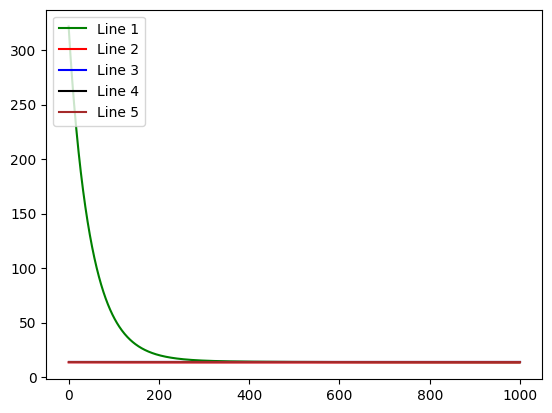

In [59]:
# Plot between update and theta

# plt.figure()
# plt.plot(range(1000), costs, marker='o', linestyle='-', color='b')
# plt.title('Plot: Costs per iterations')
# plt.xlabel('iteration')
# plt.ylabel('cost')

# # plt.grid(True)

# plt.show()

fig, ax = plt.subplots()
ax.plot(range(1000), multi_costs[0], color = 'green', label = 'Line 1')
ax.plot(range(1000), multi_costs[1], color = 'red', label = 'Line 2')
ax.plot(range(1000), multi_costs[2], color = 'blue', label = 'Line 3')
ax.plot(range(1000), multi_costs[3], color = 'black', label = 'Line 4')
ax.plot(range(1000), multi_costs[4], color = 'brown', label = 'Line 5')
ax.legend(loc = 'upper left')
plt.show()





In [36]:
update = np.zeros(X_train.shape[1])
update

y_pred = np.dot(X_train, theta)
y_pred

X_train
theta = np.random.uniform(0, 1, size=(X_train.shape[1]))
theta

print(error.shape)

(400,)


ValueError: x and y must have same first dimension, but have shapes (13,) and (1000,)

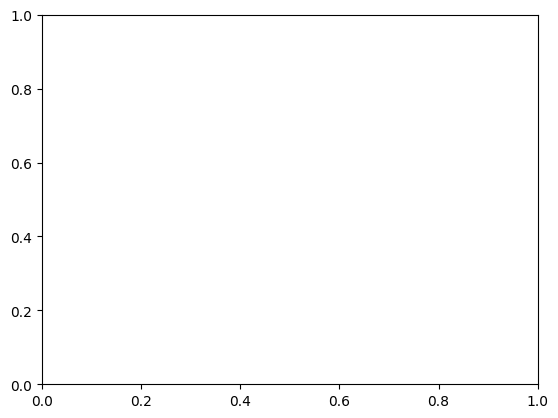

In [48]:
# Plot between update and theta

plt.figure()
plt.plot(theta, costs, marker='o', linestyle='-', color='b')
plt.title('Plot: theta vs update')
plt.xlabel('theta')
plt.ylabel('update')

# plt.grid(True)

plt.show()

# 